# (Fordgobike-tripdata)

##### by ( Mohamed Gharib )

### Preliminary Wrangling


In [23]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


 loading the data 

In [24]:
df =pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


# Data wrangling

- we find some missing value and we well drop it

- we find some columes need to be converted to be more easy to deal with like converting duration from sec to minutes , converting start time and end time from object to date , converting user_type from object to categorical data ,converting  station's id from float to string and  converting bike_id from integer to str

- we need also to adding new columns contains riders ages 


In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(174952, 16)

In [28]:
# The steps to Wrangling data 
df['duration_sec']= df['duration_sec']/60
df['end_time']= pd.to_datetime(df.end_time)
df['start_time']=pd.to_datetime(df.start_time)
df['user_type']=df['user_type'].astype('category')
df['end_station_id']=df['end_station_id'].astype(str)
df['start_station_id']=df['start_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)
df['member_age'] = 2021 - df['member_birth_year']

In [29]:
# to confirm my wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null float64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
member_age                 174952 non-null float64
dtypes: catego

# the main features of interest in  dataset .

- it's obvious that we can't use all columns in dataset we only use that will help us to investigation like
 duration_sec
,start_time
,end_time
,start_station_id
,end_station_id
,bike_id
,user_type
,member_age
,member_gender


# Univariate Exploration

- In this section, investigate distributions of individual variables and find  relationships between variables.

In [54]:
# function to plot the labels of figure.
def labels (x_axis , y_axis ,title):
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)

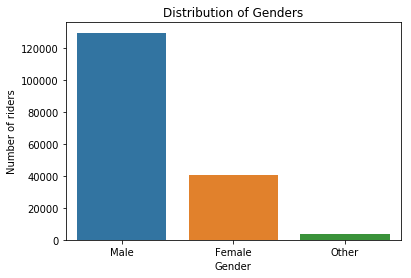

In [55]:
sb.countplot(data=df , x='member_gender')
labels("Gender","Number of riders","Distribution of Genders");

it seems that  the most riders are males

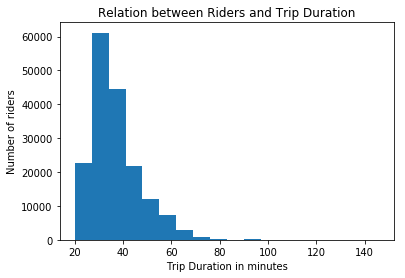

In [53]:
bins=np.arange(df['member_age'].min(),df['member_age'].max()+7,7)
plt.hist(data=df ,x= 'member_age' , bins =bins)
labels('Trip Duration in minutes','Number of riders','Relation between Riders and Trip Duration');

It seems that Most Riders Aged Between 20 to 45

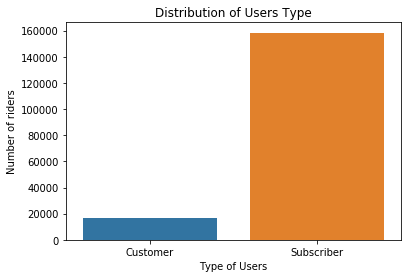

In [33]:
sb.countplot(data=df,x='user_type')
labels('Type of Users','Number of riders','Distribution of Users Type');

it's obvious  the most members are subscribers

In [34]:
(df['duration_sec'].describe())

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_sec, dtype: float64

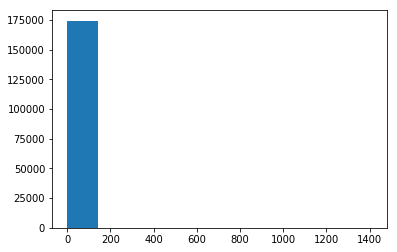

In [35]:
plt.hist(data=df , x='duration_sec');

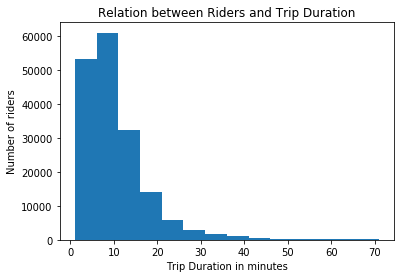

In [36]:
bins=np.arange(df['duration_sec'].min(),70+5,5)
plt.hist(data=df , x='duration_sec',bins=bins)
labels('Trip Duration in minutes','Number of riders','Relation between Riders and Trip Duration');

Duration trips are between 3 minutes to 15 minutes

#### we need to add som columns to make more visualizations 
- like hours and days and  months

In [37]:
## Adding  columns
df['hours']=df.start_time.dt.hour
df['days']=df.start_time.dt.day
df['months']=df.start_time.dt.month
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,hours,days,months
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0,17,28,2
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0,12,28,2
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0,17,28,2
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0,23,28,2
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0,23,28,2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null float64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
member_age                 174952 non-null float64
hours         

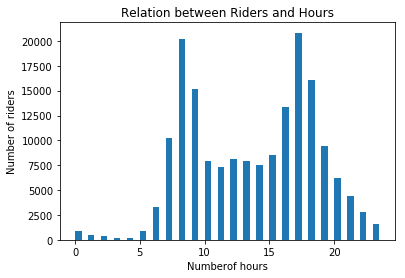

In [52]:
plt.hist(data=df,x='hours',bins = np.arange(0,df.hours.max()+1,0.5));
labels('Numberof hours','Number of riders','Relation between Riders and Hours');

the  plot shows that  17 pm and 8 Am is the most starting hour of trips

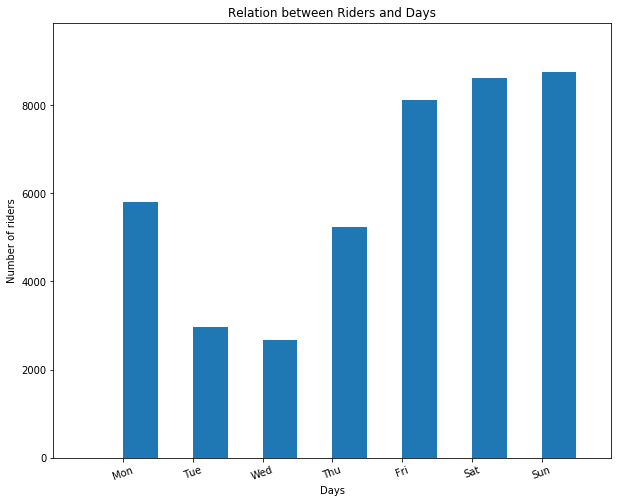

In [56]:
#plt.subplot(2,1,1)
plt.figure(figsize=(10,8))
plt.hist(data=df,x='days',bins=np.arange(0,df.days.max()+1,0.5))
plt.xticks(np.arange(1,8, step=1),["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],rotation=20)
plt.xlim((0,8));
labels('Days','Number of riders','Relation between Riders and Days');

.the plot shows that there are more trips in days from friday to sunday than other days                                          
.this means also that most users make their trip on weekends

## Discuss the distributions we find in dataset.
- we find that  most riders are males and their  Age Between 20 to 45 and they are subscribers, not customers.                  
- the most starting hour of trips between  8 Am  and 17 pm  and more trips in days from Friday to Sunday than other days, which means  users make their trip on weekends and  Duration trips are between 3 minutes to 15 minutes.

# Bivariate Exploration

In this section, investigate relationships between pairs of variables in your data.


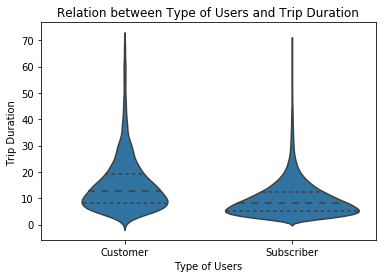

In [51]:
base_color = sb.color_palette()[0]
df=df.query('duration_sec < 70')
sb.violinplot(data=df , x='user_type' ,y = 'duration_sec',color=base_color ,inner='quartile')
labels('Type of Users','Trip Duration ','Relation between Type of Users and Trip Duration');

the trips duration for Subscribers are more than the Customers.

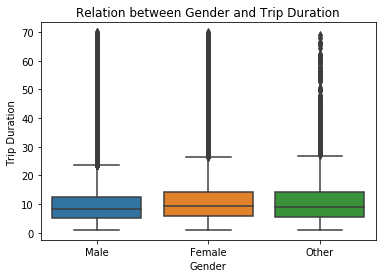

In [57]:
sb.boxplot(data=df,x='member_gender' ,y = 'duration_sec')
labels('Gender','Trip Duration ','Relation between Gender and Trip Duration');

 the Trip duration is almost the same for all genders.

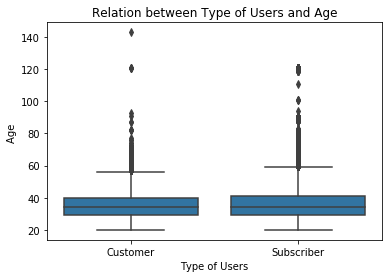

In [58]:
sb.boxplot(data=df, x='user_type', y='member_age', color=base_color)
labels('Type of Users','Age ','Relation between Type of Users and Age');

 the Age of Customers  are almost the same to the ages of Subscribers.


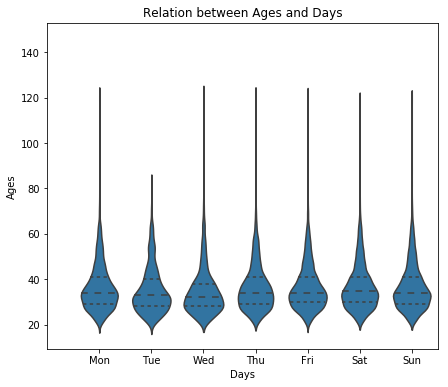

In [59]:
plt.figure(figsize=(7,6))
sb.violinplot(data=df, x='days', y='member_age', color=base_color ,inner='quartile')
plt.xticks(np.arange(8),["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlim(-1,6.5);
labels('Days','Ages','Relation between Ages and Days');

the above plot shows that the ages of the riders from Thursday to Sunday are older than the riders from Monday to Wednesday

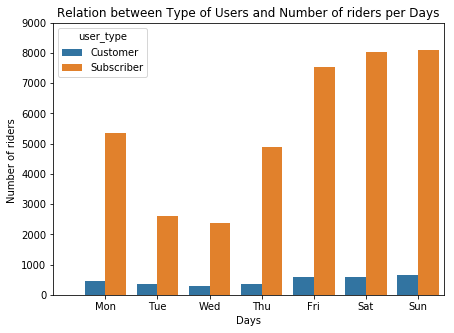

In [50]:
plt.figure(figsize=(7,5))
sb.countplot(data=df, x='days', hue='user_type')
plt.xticks(np.arange(7),["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlim(-1,6.5)
labels('Days','Number of riders ','Relation between Type of Users and Number of riders per Days');

the above curve shows that the number of subscribers decrease from Monday to Thursday which indicates that they  didn't use bikes mostly in their daily work.

#  the relationships we observed in this part of the investigation.
- the duration of the trip for Subscribers are more than the Customers
- the Trip duration is almost the same for all genders
- the ages of the riders from Thursday to Sunday are older than the riders from Monday to Wednesday
- the number of subscribers decrease from Monday to Thursday which indicates that they didn't use bikes mostly in their daily work.


# Multivariate Exploration
Create plots of three or more variables to investigate your data even further.

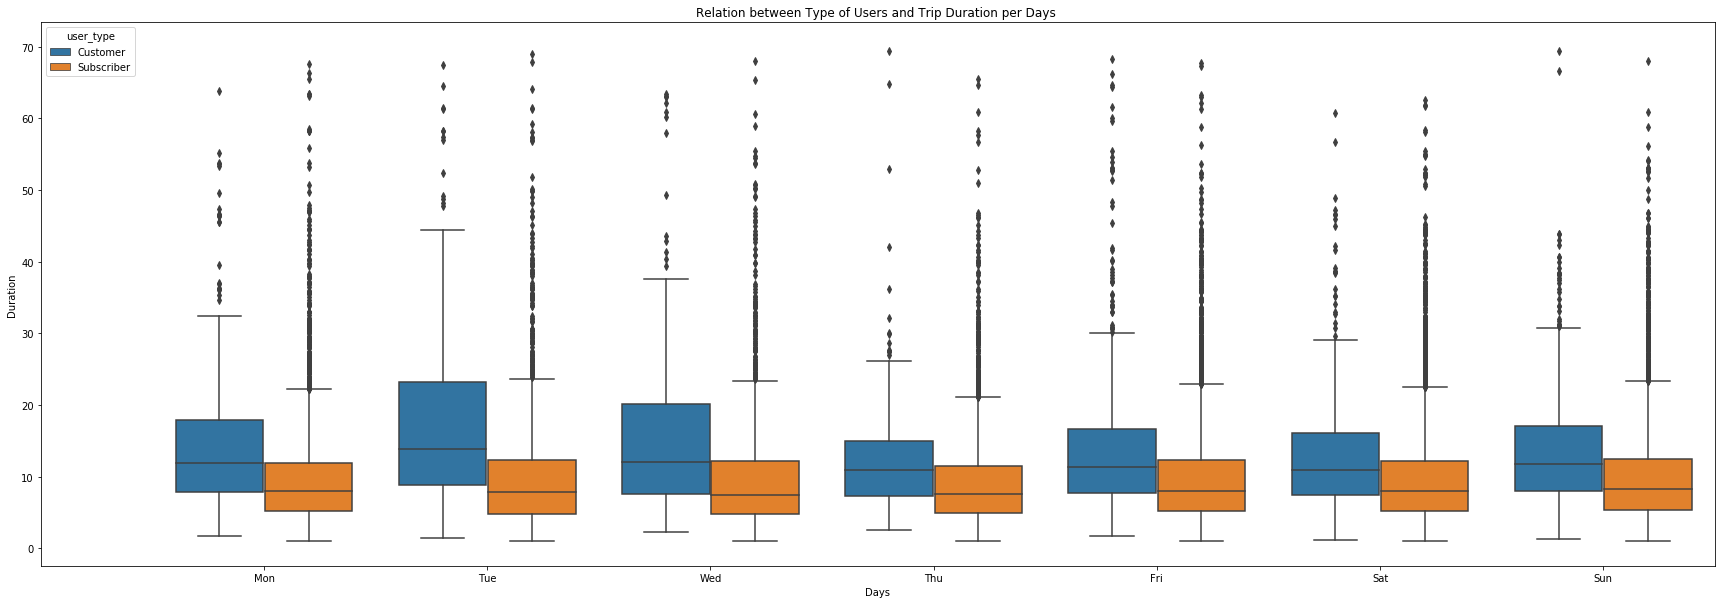

In [48]:
df = df.query('duration_sec < 70')

plt.figure(figsize=(30,10))
sb.boxplot(data = df, x="days", y="duration_sec", hue="user_type")
plt.xticks(np.arange(7),["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlim(-1,6.5)
labels('Days','Duration','Relation between Type of Users and Trip Duration per Days ');

the figure shows that there no Big Changes in the Duration per day for the Subscribers but there is a big change in duration per day for the Customers as it increases high in Monday and Wednesday.

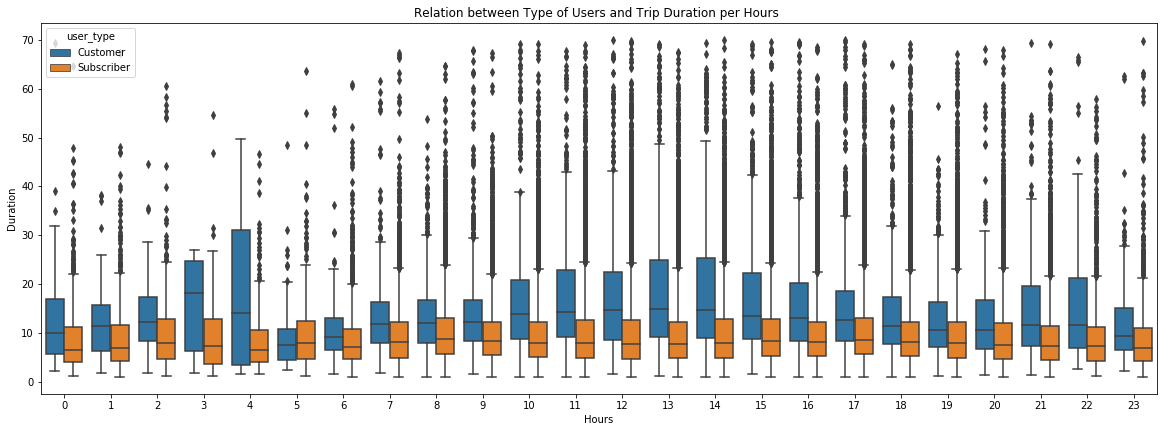

In [47]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sb.boxplot(data=df,x="hours", y="duration_sec", hue="user_type")
labels('Hours','Duration','Relation between Type of Users and Trip Duration per Hours ');

the figure shows that there no big changes in the Duration per hour for the Subscribers but there is a big Change in Duration per hour for the Customers.

# the relationships you observed in this part of the investigation.

- there no Big Changes in the Duration per day for the Subscribers but there is a big change in duration per day for the Customers as it increases high in Monday and Wednesday.

- there no big changes in the Duration per hour for the Subscribers but there is a big Change in Duration per hour for the Customers.